### CS6647 HW-5
#### Steven Robbins
#### 07/09/2023

## Markov Chain Calculations - See final answers at bottom of notebook.

#### Use the following state diagram:

1. The starting state is Rest. Calculate the probability of possible activity on the 15th day. 
2. What about the state and probability after 10000 days?
3. What do you observe from the above two?

|         | Rest      | Exercises | Sweeties  |
|---------|-----------|-----------|-----------|
| Rest    |   0.2     |   0.6     |   0.2     |
| Exercises |   0.1     |   0.6     |   0.3     |
| Sweeties |   0.2     |   0.7     |   0.1     |

### I'm going to try two methods - the Random Walk and the Eigenvector Linear Algebra approach.

### In the lecture video by [Normalized Nerd](https://www.youtube.com/watch?v=i3AkTO9HLXo) he mentions writing a Python program that represents a Random Walk on the Markov Chain. He didn't show his code but I tried to implement this below.

In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt


def RandomWalk(current_state, num_steps):
    # trans probabilities
    transition_matrix = [
        [0.2, 0.6, 0.2],
        [0.1, 0.6, 0.3],
        [0.2, 0.7, 0.1]
    ]

    # possible states
    states = ['Rest', 'Exercises', 'Sweeties']

    state_frequencies = {state: 0 for state in states}

    # random walk
    print(f"Starting state: {current_state}")
    for step in range(num_steps):

        # index of the current state
        current_state_index = states.index(current_state)

        # increment the freq of the current state
        state_frequencies[current_state] += 1

        # transition probabilities for the current state
        transition_probabilities = transition_matrix[current_state_index]

        # get next state based on the trans probabilities
        next_state = random.choices(states, weights=transition_probabilities)[0]

        # update the current state
        current_state = next_state

        # print(f"Step {step+1}: {current_state}")

    
    # print final state
    print(f"Step {step+1}: {current_state}\n")
    
    # probabilities of each state
    state_probabilities = {state: frequency / num_steps for state, frequency in state_frequencies.items()}

    for state, probability in state_probabilities.items():
        print(f"Probability of {state}: {probability}")

### He also mentions using Linear Algebra to solve for a directed graph and I've tried to implement this below.
#### This will hopefully:
#### 1. take the starting state of Rest and encode it into a row vector of [1, 0, 0]
#### 2. multiply that row vector by the transition matrix
## π<sub>0</sub>[1, 0, 0] * [[0.2, 0.6, 0.2],[0.1, 0.6, 0.3],[0.2, 0.7, 0.1]] = [0.2 0.6 0.2]
#### 3. take the new row and multiply that by the transition matrix again
## π<sub>1</sub>[0.2 0.6 0.2] * [[0.2, 0.6, 0.2],[0.1, 0.6, 0.3],[0.2, 0.7, 0.1]] = [0.14, 0.62, 0.24]
#### 4. and so on...
## π<sub>2</sub>[0.14, 0.62, 0.24] * [[0.2, 0.6, 0.2],[0.1, 0.6, 0.3],[0.2, 0.7, 0.1]] = [0.138, 0.624, 0.238]
#### 


In [2]:
import random
import numpy as np
import matplotlib.pyplot as plt

def MatrixMult(current_state, num_steps):
    transition_matrix = [
        [0.2, 0.6, 0.2],
        [0.1, 0.6, 0.3],
        [0.2, 0.7, 0.1]
    ]

    # possible states
    states = ['Rest', 'Exercises', 'Sweeties']

    state_frequencies = {state: 0 for state in states}
    
    starting_state = [1 if state == current_state else 0 for state in states]
    
    print(f"Starting State Vector: {starting_state}\n")
    
    transition_matrix = np.array(transition_matrix)

    state_probabilities = starting_state

    for step in range(num_steps):
        state_probabilities = state_probabilities @ transition_matrix
        
    print("State Probabilities")
    for state, probability in zip(states, state_probabilities):
        print(f"{state}: {probability} after step {num_steps}")
    
    
    # calculate probability convergence after some large set of steps
    # eigenvector corresponding to eigenvalue 1
    eigenvalues, eigenvectors = np.linalg.eig(transition_matrix.T)
    index = np.where(np.isclose(eigenvalues, 1))[0][0]
    stationary_vector = np.real(eigenvectors[:, index] / np.sum(eigenvectors[:, index]))

    print("\nLong Term Probabilities")
    for state, long_term_prob in zip(states, stationary_vector):
        print(f"{state}: {long_term_prob} after step {num_steps}")
        


#### Random Walk - 15 days

In [3]:
# starting state
current_state = 'Rest' # <-- change this for different start state

# steps
num_steps = 15  # <-- change this for different number of steps

RandomWalk(current_state, num_steps)


Starting state: Rest
Step 15: Exercises

Probability of Rest: 0.13333333333333333
Probability of Exercises: 0.5333333333333333
Probability of Sweeties: 0.3333333333333333


#### Linear Algebra - 15 days

In [4]:
# starting state
current_state = 'Rest' # <-- change this for different start state

# steps
num_steps = 15  # <-- change this for different number of steps

MatrixMult(current_state, num_steps)

Starting State Vector: [1, 0, 0]

State Probabilities
Rest: 0.13761467889913798 after step 15
Exercises: 0.6238532110092638 after step 15
Sweeties: 0.23853211009159792 after step 15

Long Term Probabilities
Rest: 0.13761467889908255 after step 15
Exercises: 0.6238532110091743 after step 15
Sweeties: 0.2385321100917431 after step 15


#### Random Walk - 10000 days

In [5]:
# starting state
current_state = 'Rest' # <-- change this for different start state

# steps
num_steps = 10000  # <-- change this for different number of steps

RandomWalk(current_state, num_steps)

Starting state: Rest
Step 10000: Sweeties

Probability of Rest: 0.1315
Probability of Exercises: 0.6233
Probability of Sweeties: 0.2452


#### Linear Algebra - 10000 days

In [6]:
# starting state
current_state = 'Rest' # <-- change this for different start state

# steps
num_steps = 10000  # <-- change this for different number of steps

MatrixMult(current_state, num_steps)

Starting State Vector: [1, 0, 0]

State Probabilities
Rest: 0.13761467889908252 after step 10000
Exercises: 0.623853211009174 after step 10000
Sweeties: 0.23853211009174302 after step 10000

Long Term Probabilities
Rest: 0.13761467889908255 after step 10000
Exercises: 0.6238532110091743 after step 10000
Sweeties: 0.2385321100917431 after step 10000



# Final Answers
## After all of that work, I've learned enough to be able to simplify the process using only the dot products with the Numpy linear algebra library.


Final Assignment Answers:

1. The starting state is Rest. Calculate the probability of possible activity on the 15th day. 
Probability distribution after 15 days: [0.13761468 0.62385321 0.23853211]

2. What about the state and probability after 10000 days?
Probability distribution after 10000 days: [0.13761468 0.62385321 0.23853211]

3. What do you observe from the above two?
The state probabilities after 15 days are nearly the same as after 1000 days.
This can be demonstrated from viewing earlier state probabilities.
From the third day on, the probabilities are roughly the same.
After the 10th day, they are at least rounded to the same value.

Initial state:  [1. 0. 0.]
Probability distribution after 1 days: [0.2 0.6 0.2]
Probability distribution after 2 days: [0.14 0.62 0.24]
Probability distribution after 3 days: [0.138 0.624 0.238]
Probability distribution after 4 days: [0.1376 0.6238 0.2386]
Probability distribution after 5 days: [0.13762 0.62386 0.23852]
Probability distribution

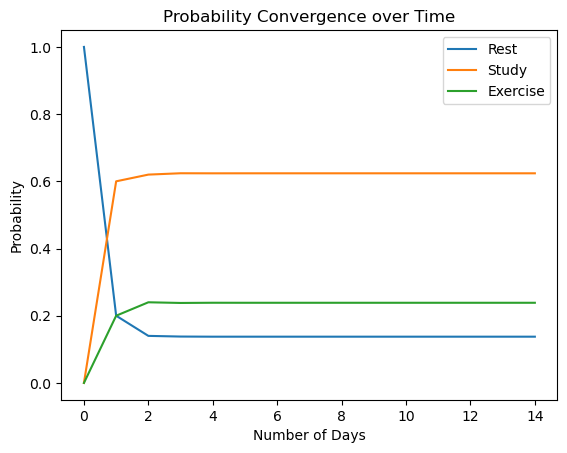

In [7]:
import numpy as np
import matplotlib.pyplot as plt

transition_matrix = np.array([
    [0.2, 0.6, 0.2],
    [0.1, 0.6, 0.3],
    [0.2, 0.7, 0.1]
])

starting_state = np.array([1, 0, 0])  # Rest state

# for visualization of prob convergence
probabilities = []
current_state = starting_state

print("\nFinal Assignment Answers:")
# calc the probability distribution after 15 days
prob = np.dot(starting_state, np.linalg.matrix_power(transition_matrix, 15))
print("\n1. The starting state is Rest. Calculate the probability of possible activity on the 15th day. ")
print("Probability distribution after 15 days:", prob)

# calc the probability distribution after 10000 days
print("\n2. What about the state and probability after 10000 days?")
prob = np.dot(starting_state, np.linalg.matrix_power(transition_matrix, 10000))
print("Probability distribution after 10000 days:", prob)

# calc the probability distribution for first 5 days
print("\n3. What do you observe from the above two?")
print(f"The state probabilities after 15 days are nearly the same as after 1000 days.")
print(f"This can be demonstrated from viewing earlier state probabilities.")
print("From the third day on, the probabilities are roughly the same.")
print("After the 10th day, they are at least rounded to the same value.")
for i in range(15):
    prob = np.dot(starting_state, np.linalg.matrix_power(transition_matrix, i))
    if (i==0):
        print(f"\nInitial state: ", prob)
    else:
        print(f"Probability distribution after {i} days:", prob)

print(f"\nWe can see as the values flatten out, they're not likely to change much no matter how many steps we add.\n")
for day in range(15):
    probabilities.append(current_state)
    current_state = np.dot(current_state, transition_matrix)

probabilities = np.array(probabilities)

# Plot the probabilities over time
plt.figure()
plt.plot(probabilities[:, 0], label='Rest')
plt.plot(probabilities[:, 1], label='Study')
plt.plot(probabilities[:, 2], label='Exercise')
plt.xlabel('Number of Days')
plt.ylabel('Probability')
plt.title('Probability Convergence over Time')
plt.legend()
plt.show()